(error-analysis-section)=
# Error analysis

We have seen in the [previous section](euler-method-section) that the [Euler method solution](euler-example) of an initial value problem deviates from the exact solution. This is because we have truncated the [Taylor series](taylor-series-definition) so that any term after the first-order derivative is ignored. The omission of the higher-order terms means that the Taylor series is longer equal to $f(t+h)$ and we have introduced an error in our calculations. It is important that we study this error and the effect that the errors have on our solutions. 

(local-truncation-error-section)=
## Local truncation error

````{admonition} Definition: Local Truncation Error (LTE)
:class: note
:name: lte-definition

The Local Truncation Error (LTE) denoted by $\tau_n$ is the error in the calculation of a single step of a numerical method assuming that the previous values used are exact.

````

Writing the [Taylor series](taylor-series-definition) using subscript notation where $y_{n+1} = y(t + h)$ we have

$$y_{n+1} = y_n + hy'(t_n, y_n) + \frac{h^2}{2!}y''(t_n, y_n) + \frac{h^3}{3!}y'''(t_n, y_n) + \frac{h^4}{4!}y''''(t_n, y_n) + \cdots $$

Since in the derivation of the Euler method we truncated the Taylor series to first-order then we have

$$y_{n+1} = y_n + h f(t_n, y_n) + \tau_n,$$

where the local truncation error is

$$ \tau = \frac{h^2}{2!}y''(t_n, y_n) + \frac{h^3}{3!}y'''(t_n, y_n) + \frac{h^4}{4!}f''''(t_n, y_n) + \cdots $$

The first term is the *supremum* (it has a larger value that the other terms) so we can say that the value $\tau$ is bounded by some function $Ch^2$ where $C$ is some positive constant. We express this idea using the [**big-O**](https://en.wikipedia.org/wiki/Big_O_notation) notation where $\tau = O(h^{n+1})$ which is read as *"tau is big oh of h to the power n plus 1"*.

(global-truncation-error-section)=
## Global truncation error

````{admonition} Definition: Global Truncation Error (GTE)
:class: note
:name: gte-definition

The Global Truncation Error (GTE), which is denoted by $E_n$, is the error that has accumulated over all previous steps of a numerical method assuming the initial solution was known to be exact. 

````

The global truncation error is calculated using

\begin{align*}
    E_n = |y_n - \bar{y}_n|,
\end{align*}

where $y_n$ and $\bar{y}_n$ are the exact and numerical solutions. This is represented graphically in {numref}`gte-figure`.

```{glue:figure} gte_fig
:name: gte-figure

The global truncation error, $E_n$, is the difference between the exact solution, $y_n$, and the numerical solution, $\bar{y}_n$.
```

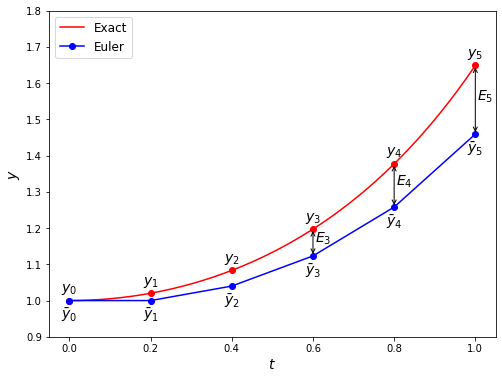

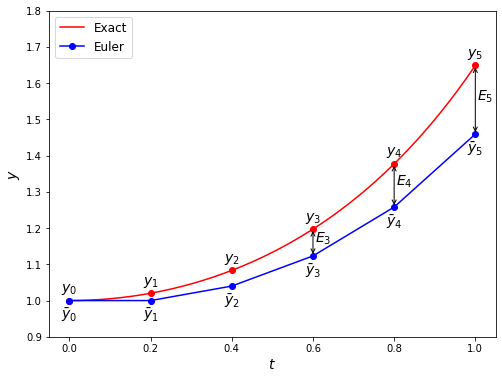

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from myst_nb import glue

def euler(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((len(t), len(y0)))
    y[0,:] = y0
    for n in range(nsteps):
        y[n+1,:] = y[n,:] + h * f(t[n], y[n,:])
        
    return t, y 

def f(t, y):
    return t * y

def exact(t):
    return np.exp(t ** 2 / 2)

# Define IVP
tspan = [0, 1]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h = 0.2         # step length

# Calculate the solution to the IVP
t, y = euler(f, tspan, y0, h)
    
# Plot solution
t1 = np.linspace(tspan[0], tspan[1], 200)
y1 = exact(t1)
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(t1, y1, "r-", label="Exact")
plt.plot(t, exact(t), "ro")
plt.plot(t, y, "bo-", label="Euler")
for i in range(len(t)):
    plt.text(t[i], y[i,0] - 0.05, rf"$\bar{{y}}_{i}$", fontsize=14, ha="center")
    plt.text(t[i], exact(t[i])+0.025, f"$y_{i}$", fontsize=14, ha="center")
    if i > 2:
        plt.text(t[i]+0.005, y[i,0]/2 + exact(t[i])/2, f"$E_{i}$", fontsize=14)
        plt.annotate(s='', xy=(t[i],y[i]), xytext=(t[i],exact(t[i])), arrowprops=dict(arrowstyle='<->'))

plt.ylim([0.9, 1.8])
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

glue("gte_fig", fig, display=False)

We can use the global and local truncations errors to analyse the accuracy of a method. Comparing the application of the Euler method using the exact and approximated solutions 

\begin{align*}
    y_{n+1} &= y_{n} + hf(t_n, y_n), \\
    \bar{y}_{n+1} &= \bar{y}_n + hf(t_n, \bar{y}_n) + \tau_{n+1}
\end{align*}

and subtracting the first equation from the second gives

\begin{align*}
    y_{n+1} - \bar{y}_{n+1} &= y_n - \bar{y}_n + h(f(t_n, y_n) - f(t_n, \bar{y}_n)) + \tau_{n+1} \\
    E_{n+1} &= E_n + h(f(t_n, y_n) - f(t_n, \bar{y}_n)) + \tau_{n+1} 
\end{align*}

Assuming that $f(t,y)$ satisfies the [**Lipschitz condition**](https://en.wikipedia.org/wiki/Lipschitz_continuity) which is

\begin{align*}
    |f(t_n, y_n) - f(t_{n+1}, y_{n+1})| \leq L|y_n - y_{n+1}|,
\end{align*}

where $L$ is the **Lipschitz constant**, then it can be shown that the GTE satisfies

\begin{align*}
    |E_n| \leq \frac{\max_i (\tau_i)}{h} \left(\frac{e^{L(t_n - t_0)} - 1}{L}\right).
\end{align*}

The term in the brackets is just some constant, $C$ say, and since $\tau = O(h^2)$ then

\begin{align*}
    |E_n| \leq C\frac{O(h^2)}{h} = O(h).
\end{align*} 

````{admonition} Definition: Order of a method
:class: note
:name: order-of-a-method-definition

The order of a method is the order of the global truncation error for that method.

````

In practical terms, the order of a method tells us how quickly $E \to 0$ as $h \to 0$ so if a method is order 2, i.e., $E = O(h^2)$, then if $h$ is halved then $E$ decreases by a factor of $(\frac{1}{2})^2 = \frac{1}{4}$. 

We can demonstrate this with the Euler method. The plot shown in {numref}`euler-hvalues-figure` below shows the solutions to the IVP from [the Euler method example](euler-example) calculated using step lengths of $h=0.2$, $h=0.1$, $h=0.05$ and $h=0.025$. As the step length decreases the numerical solution gets closer to the exact solution as expected.

```{glue:figure} euler_hvalues_fig
:name: euler-hvalues-figure

Solutions to the IVP $y'=ty$, $t\in[0,1]$, $y(0)=1$ using the Euler method with step lengths $h=0.2, 0.1, 0.05, 0.025$.
```

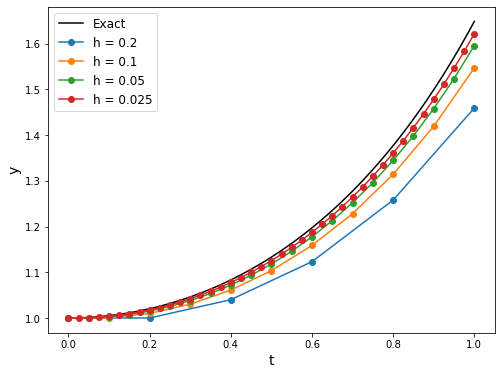

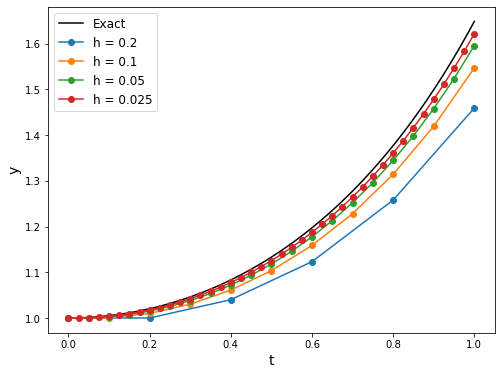

In [2]:
# Calculate solution for decreasing step lengths and plot the solution
hvalues = [0.2, 0.1, 0.05, 0.025]
errors = []
texact = np.linspace(tspan[0], tspan[1], 200)
yexact = exact(texact)
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(texact, yexact, "k", label="Exact")
for h in hvalues:
    t, y = euler(f, tspan, y0, h)
    plt.plot(t, y, "o-", label=f"h = {h}")
    errors.append(abs(yexact[-1] - y[-1,0]))
plt.xlabel('t', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(fontsize=12)
plt.show()

glue("euler_hvalues_fig", fig, display=False)

The global truncation errors for the solution to the IVP at $t=1$ are plotted against the values of the step length in {numref}`euler-gte-figure` below. Note how the errors form more or less a straight line which show that has $h$ decreases, the errors also decrease in a linear fashion indicating that the Euler method is first-order.

```{glue:figure} euler_gte_fig
:name: euler-gte-figure

The global truncation errors for the Euler method solution of $y'=t y$, $y(0)=1$ at $t=1$.
```

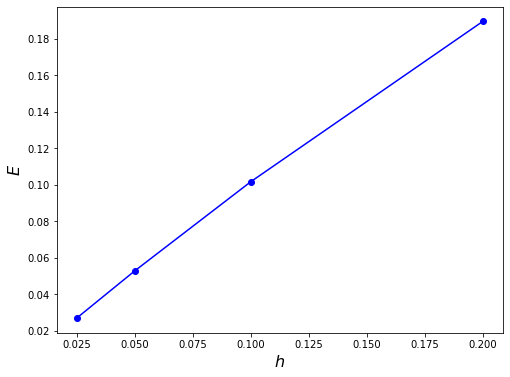

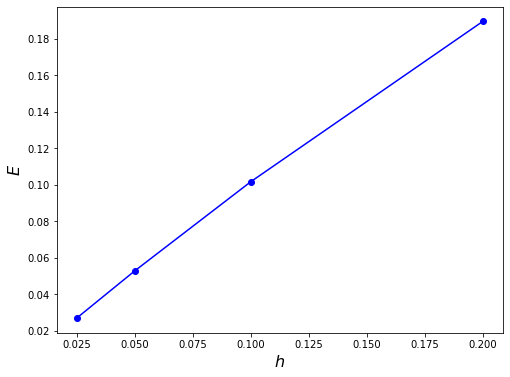

In [3]:
# Plot errors
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(hvalues, errors, 'bo-')
plt.xlabel("$h$", fontsize=16)
plt.ylabel("$E$", fontsize=16)
plt.show()

glue("euler_gte_fig", fig, display=False)